# Splitting Data

## Import relevant modules

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

## Load the datasets from the internet

In [2]:
train_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")
test_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_test.csv")

## Scale the label values

In [3]:
scale_factor = 1000.0

# Scale the training set's label.
train_df["median_house_value"] /= scale_factor 

# Scale the test set's label
test_df["median_house_value"] /= scale_factor

## Define build and train model function

In [4]:
def build_model(my_learning_rate):
    """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential. 
  # A sequential model contains one or more layers.
    model = tf.keras.models.Sequential()

  # Describe the topography of the model.
  # The topography of a simple linear regression model is a single node in a single layer. 
    model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))

  # Compile the model topography into code that 
  # TensorFlow can efficiently execute. Configure training to minimize the model's mean squared error. 
    model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate), # optimizer that implements the RMSprop algorithm.
                loss="mean_squared_error", # computes the mean of squares of errors between labels and predictions.
                metrics=[tf.keras.metrics.RootMeanSquaredError()])  # computes root mean squared error metric between 
                                                                    # y_true (label) and y_pred (prediction)

    return model

def train_model(model, df, feature, label, my_epochs, my_batch_size=None, my_validation_split=0.1):
    """Feed a dataset into the model in order to train it."""

    history = model.fit(x=df[feature],
                        y=df[label],
                        batch_size=my_batch_size,
                        epochs=my_epochs,
                        validation_split=my_validation_split)

  # Gather the model's trained weight and bias.
    trained_weight = model.get_weights()[0]  # w_1 in function y' = b + (w_1 * x_1)
    trained_bias = model.get_weights()[1]    # w_0 or b

  # The list of epochs is stored separately from the rest of history.
    epochs = history.epoch
  
  # Isolate the root mean squared error for each epoch.
    hist = pd.DataFrame(history.history)
    rmse = hist["root_mean_squared_error"]

    return epochs, rmse, history.history   

## Define plotting function

In [5]:
def plot_the_loss_curve(epochs, mae_training, mae_validation):
    """Plot a curve of loss vs. epoch."""

    plt.figure()
    plt.xlabel("Epoch")
    plt.ylabel("Root Mean Squared Error")

    plt.plot(epochs[1:], mae_training[1:], label="Training Loss")
    plt.plot(epochs[1:], mae_validation[1:], label="Validation Loss")
    plt.legend()
  
  # We're not going to plot the first epoch, since the loss on the first epoch
  # is often substantially greater than the loss for other epochs.
    merged_mae_lists = mae_training[1:] + mae_validation[1:]
    highest_loss = max(merged_mae_lists)
    lowest_loss = min(merged_mae_lists)
    delta = highest_loss - lowest_loss
    print(delta)

    top_of_y_axis = highest_loss + (delta * 0.05)
    bottom_of_y_axis = lowest_loss - (delta * 0.05)
   
    plt.ylim([bottom_of_y_axis, top_of_y_axis])
    plt.show()

## Experiment with the validation split

2022-08-03 14:49:29.351933: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/nguyenhien/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Epoch 1/30
136/136 [==============================] - 1s 6ms/step - loss: 37001.1328 - root_mean_squared_error: 192.3568 - val_loss: 44867.4219 - val_root_mean_squared_error: 211.8193
Epoch 2/30
136/136 [==============================] - 0s 3ms/step - loss: 21045.7500 - root_mean_squared_error: 145.0715 - val_loss: 25939.9863 - val_root_mean_squared_error: 161.0590
Epoch 3/30
136/136 [==============================] - 0s 2ms/step - loss: 11137.3799 - root_mean_squared_error: 105.5338 - val_loss: 14041.5713 - val_root_mean_squared_error: 118.4971
Epoch 4/30
136/136 [==============================] - 0s 2ms/step - loss: 6972.1987 - root_mean_squared_error: 83.4997 - val_loss: 9467.6143 - val_root_mean_squared_error: 97.3017
Epoch 5/30
136/136 [==============================] - 0s 2ms/step - loss: 6515.3213 - root_mean_squared_error: 80.7175 - val_loss: 9212.9180 - val_root_mean_squared_error: 95.9839
Epoch 6/30
136/136 [==============================] - 0s 3ms/step - loss: 6514.0059 - ro

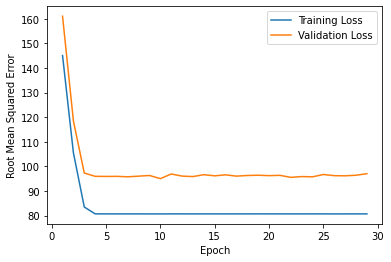

In [6]:
# The following variables are the hyperparameters.
learning_rate = 0.08
epochs = 30
batch_size = 100

# Split the original training set into a reduced training set and a validation set. 
validation_split = 0.2

# Identify the feature and the label.
my_feature = "median_income"    # the median income on a specific city block.
my_label = "median_house_value" # the median house value on a specific city block.
# That is, you're going to create a model that predicts house value based 
# solely on the neighborhood's median income.  

# Invoke the functions to build and train the model.
my_model = build_model(learning_rate)
epochs, rmse, history = train_model(my_model, train_df, my_feature, 
                                    my_label, epochs, batch_size, 
                                    validation_split)

plot_the_loss_curve(epochs, history["root_mean_squared_error"], 
                    history["val_root_mean_squared_error"])

## Determine **why** the loss curves differ

In [8]:
train_df.head(n=1000)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.3,34.2,15.0,5612.0,1283.0,1015.0,472.0,1.5,66.9
1,-114.5,34.4,19.0,7650.0,1901.0,1129.0,463.0,1.8,80.1
2,-114.6,33.7,17.0,720.0,174.0,333.0,117.0,1.7,85.7
3,-114.6,33.6,14.0,1501.0,337.0,515.0,226.0,3.2,73.4
4,-114.6,33.6,20.0,1454.0,326.0,624.0,262.0,1.9,65.5
...,...,...,...,...,...,...,...,...,...
995,-117.1,32.5,8.0,6533.0,1217.0,4797.0,1177.0,4.0,144.4
996,-117.1,34.6,6.0,5110.0,1044.0,1938.0,724.0,3.2,112.8
997,-117.1,34.2,22.0,4397.0,931.0,1145.0,445.0,4.5,108.4
998,-117.1,34.0,24.0,4144.0,826.0,2127.0,772.0,2.5,96.0


## Fix the problem

Epoch 1/70


/Users/nguyenhien/opt/anaconda3/lib/python3.9/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


136/136 [==============================] - 1s 4ms/step - loss: 44629.1719 - root_mean_squared_error: 211.2562 - val_loss: 35556.6758 - val_root_mean_squared_error: 188.5648
Epoch 2/70
136/136 [==============================] - 0s 3ms/step - loss: 26217.0098 - root_mean_squared_error: 161.9167 - val_loss: 19930.6855 - val_root_mean_squared_error: 141.1761
Epoch 3/70
136/136 [==============================] - 1s 4ms/step - loss: 14134.4082 - root_mean_squared_error: 118.8882 - val_loss: 10519.1572 - val_root_mean_squared_error: 102.5629
Epoch 4/70
136/136 [==============================] - 0s 3ms/step - loss: 8220.7227 - root_mean_squared_error: 90.6682 - val_loss: 7117.3853 - val_root_mean_squared_error: 84.3646
Epoch 5/70
136/136 [==============================] - 0s 3ms/step - loss: 7040.2876 - root_mean_squared_error: 83.9064 - val_loss: 6953.9360 - val_root_mean_squared_error: 83.3903
Epoch 6/70
136/136 [==============================] - 0s 3ms/step - loss: 7029.9390 - root_mean_squ

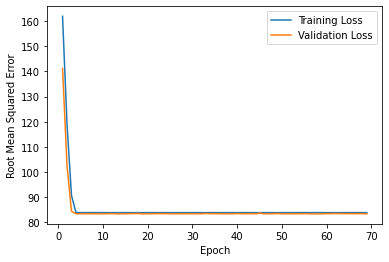

In [9]:
# The following variables are the hyperparameters.
learning_rate = 0.08
epochs = 70
batch_size = 100

# Split the original training set into a reduced training set and a validation set. 
validation_split = 0.2

# Identify the feature and the label.
my_feature = "median_income"    # the median income on a specific city block.
my_label = "median_house_value" # the median house value on a specific city block.
# That is, you're going to create a model that predicts house value based 
# solely on the neighborhood's median income.  

# Shuffle the examples.
shuffled_train_df = train_df.reindex(np.random.permutation(train_df.index)) 

# Invoke the functions to build and train the model. Train on the shuffled training set.
my_model = build_model(learning_rate)
epochs, rmse, history = train_model(my_model, shuffled_train_df, my_feature, 
                                    my_label, epochs, batch_size, 
                                    validation_split)

plot_the_loss_curve(epochs, history["root_mean_squared_error"], 
                    history["val_root_mean_squared_error"])

## Use the Test Dataset to Evaluate Your Model's Performance

In [12]:
x_test = test_df[my_feature]
y_test = test_df[my_label]

results = my_model.evaluate(x_test, y_test, batch_size=batch_size)

30/30 [==============================] - 0s 4ms/step - loss: 7011.0771 - root_mean_squared_error: 83.7322


After all, the root mean squared error (rmse) of the model when evaluated on each of the three datasets is:

- training set: `83.8468`
- validation set: `83.3697`
- test set: `83.7322`

**=> The rmse values were similar enough.**